<a href="https://colab.research.google.com/github/mosesblack1984-debug/TisdaleRepo/blob/main/USVTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Example Regression Model
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Loading
data = pd.read_csv('dataset.csv')

# Preprocessing (Example - Adapt to your data)
# Handling Missing Values (Example - Imputation with the mean for numeric features)
# Select only numeric columns for mean calculation
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean()) # Simple imputation.

# Calculate the average of numeric columns for each row
data['row_average'] = data[numeric_cols].mean(axis=1)

# Initialize target_tff column with zeros
data['target_tff'] = 0

# Set target_tff to the row average for every 10th row
data.loc[data.index % 10 == 9, 'target_tff'] = data.loc[data.index % 10 == 9, 'row_average']


# Feature Engineering (Example - Rolling Average)
# Ensure 'Vibration Levels ' is numeric before applying rolling mean
if 'Vibration Levels ' in data.columns and pd.api.types.is_numeric_dtype(data['Vibration Levels ']):
  data['sensor1_rolling_mean'] = data['Vibration Levels '].rolling(window=10).mean() # Create a 10-period rolling average
else:
  print("Warning: 'Vibration Levels ' column is not numeric. Skipping rolling mean calculation.")


# Drop rows with NaN created by rolling mean
data = data.dropna()

# Prepare Data
# Ensure features are numeric
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Vibration Levels ', 'Operational Hours']] # Features, using actual numeric columns from the dataframe
if 'sensor1_rolling_mean' in data.columns:
    X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Vibration Levels ', 'Operational Hours', 'sensor1_rolling_mean']]
else:
    X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Vibration Levels ', 'Operational Hours']]


# Ensure target is numeric
if 'target_tff' in data.columns and pd.api.types.is_numeric_dtype(data['target_tff']):
  y = data['target_tff']  # Target: Time-to-Failure
else:
  print("Error: 'target_tff' column not found or is not numeric. Cannot proceed with model training.")
  # You might want to add error handling or load data differently if target_tff is missing or not numeric.


# 3. Data Splitting
# Check if y is defined before splitting
if 'y' in locals():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Model Training
    model = RandomForestRegressor(n_estimators=100, random_state=42) # Example: Random Forest
    model.fit(X_train, y_train)

    # 5. Prediction
    y_pred = model.predict(X_test)

else:
    print("Skipping model training and prediction due to missing or non-numeric 'target_tff'.")

# print(data)

/tmp/ipython-input-1380185731.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[270.075      306.8025     271.28875    289.71875    272.825
 276.8475     297.6375     278.34032258 307.39256048 288.34387097
 279.37689516 289.475      265.23625    294.355      294.6725
 293.7775     312.85125    278.96875    326.005      313.20875
 317.915      347.87       298.83764113 343.87832661 308.6452621
 332.18719758 317.8425     315.9475     313.66625    336.78375
 319.77       338.47625    353.26875    355.1875     341.54375
 340.89875    342.655      365.385      329.67875    326.42125
 335.715      341.96979839 309.76173387 348.46491936 361.16935484
 347.43125    359.06125    332.355      339.16       357.00375   ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index % 10 == 9, 'target_tff'] = data.loc[data.index % 10 == 9, 'row_average']


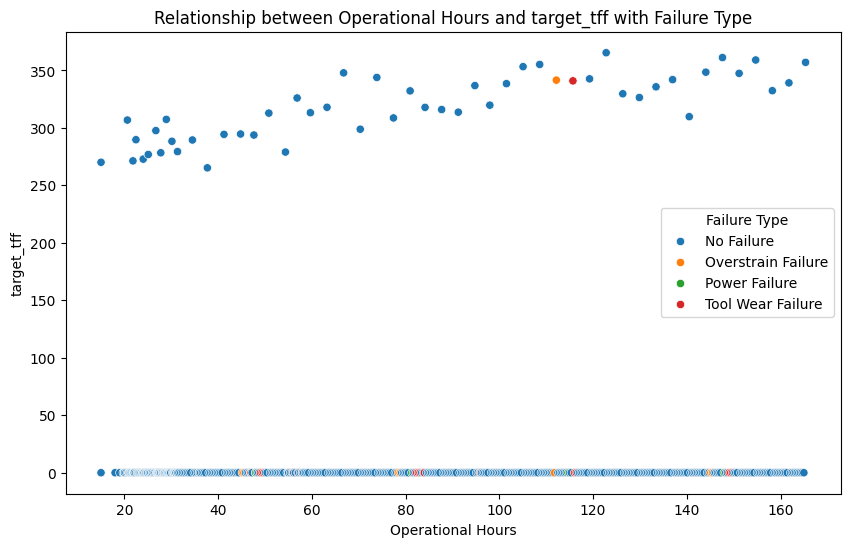

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'target_tff' and 'Operational Hours' are in your DataFrame 'data'
if 'target_tff' in data.columns and 'Operational Hours' in data.columns and 'Failure Type' in data.columns:
    if pd.api.types.is_numeric_dtype(data['target_tff']) and pd.api.types.is_numeric_dtype(data['Operational Hours']):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x='Operational Hours', y='target_tff', hue='Failure Type')
        plt.title('Relationship between Operational Hours and target_tff with Failure Type')
        plt.xlabel('Operational Hours')
        plt.ylabel('target_tff')
        plt.show()
    else:
        print("Error: 'target_tff' or 'Operational Hours' columns are not numeric. Cannot generate plot.")
else:
    print("Error: 'target_tff', 'Operational Hours', or 'Failure Type' columns not found in the DataFrame. Cannot generate plot.")